In [1]:
import pandas as pd
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [2]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Decision Tree**

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.8992
Precision: 0.9350
Recall:    0.8779
F1 Score:  0.9055

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       107
           1       0.93      0.88      0.91       131

    accuracy                           0.90       238
   macro avg       0.90      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



# **Global Interpetability**

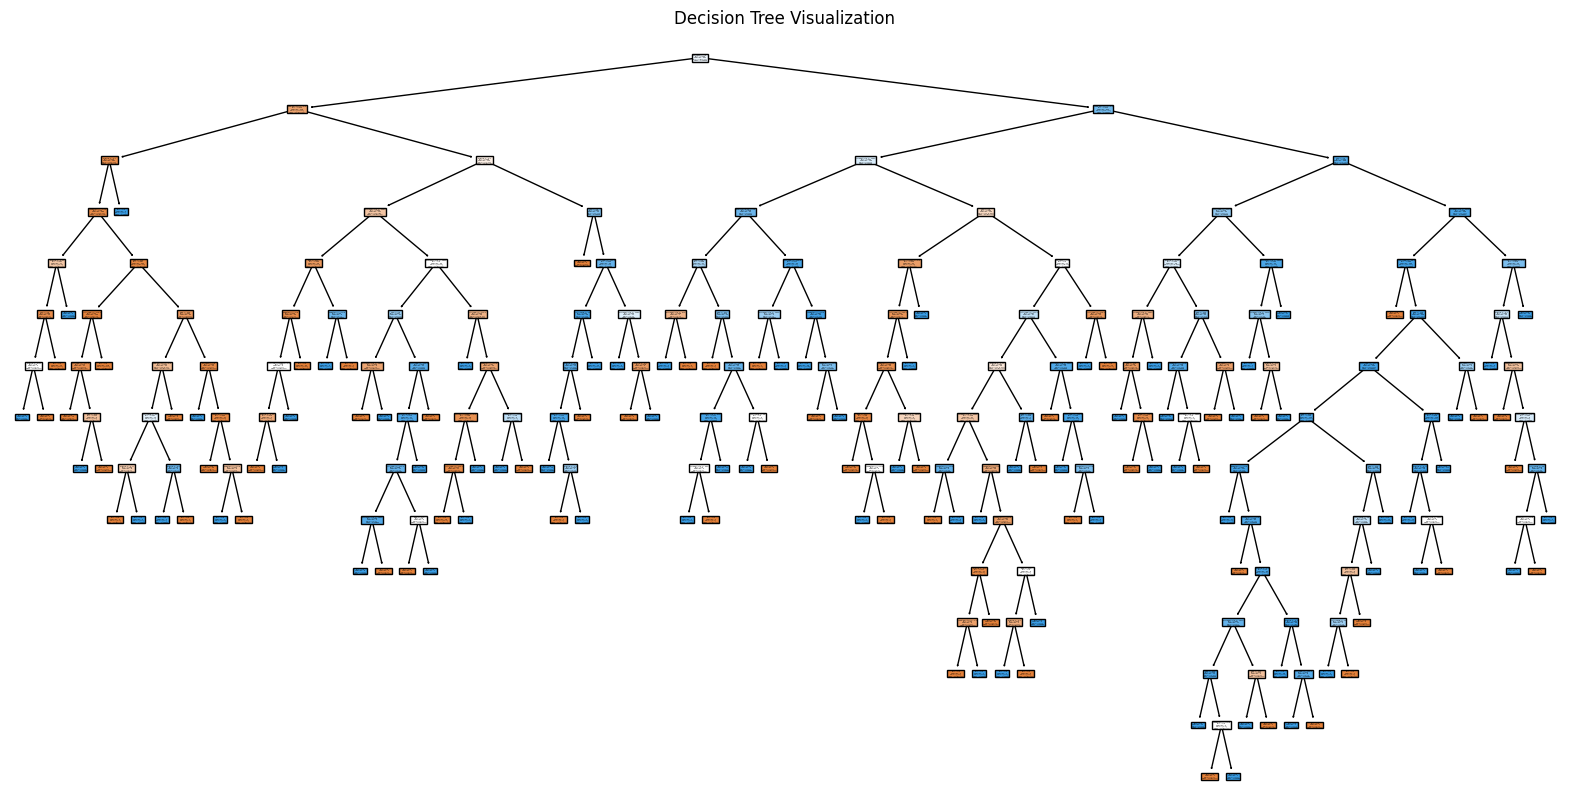

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# **Feature Importance Plot**

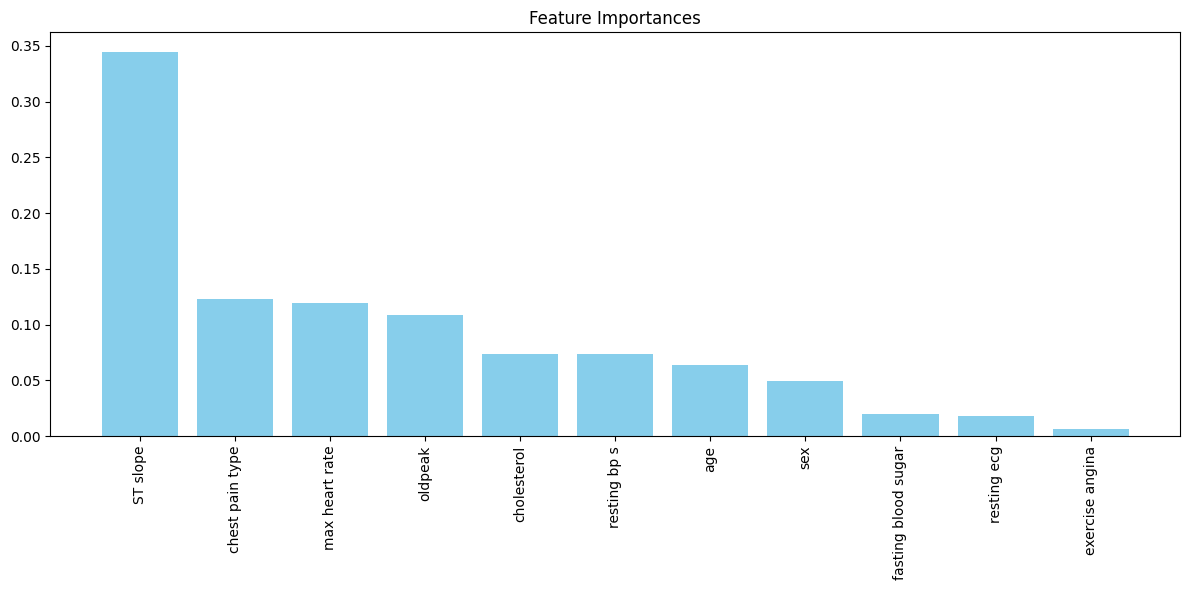

In [5]:
import numpy as np

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# **PDP**

Plotting Partial Dependence for: ('age', 'sex')


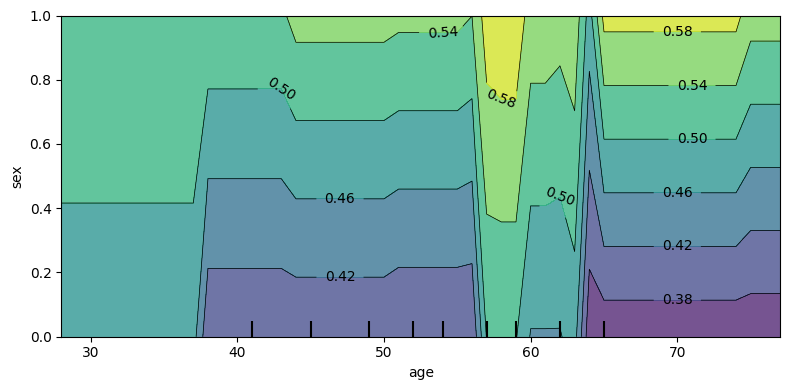

Plotting Partial Dependence for: ('age', 'ST slope')


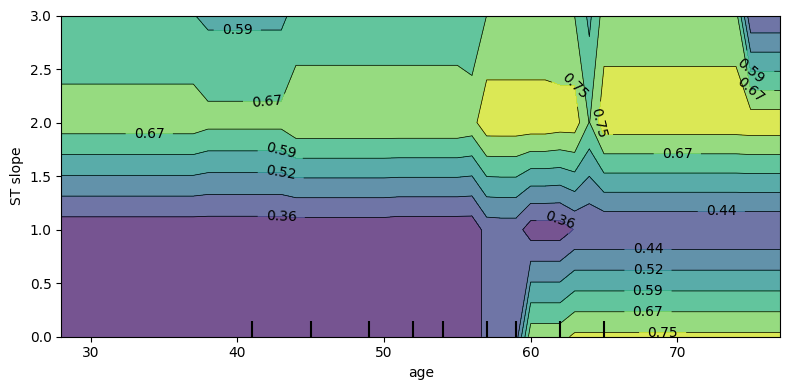

Plotting Partial Dependence for: ('age', 'chest pain type')


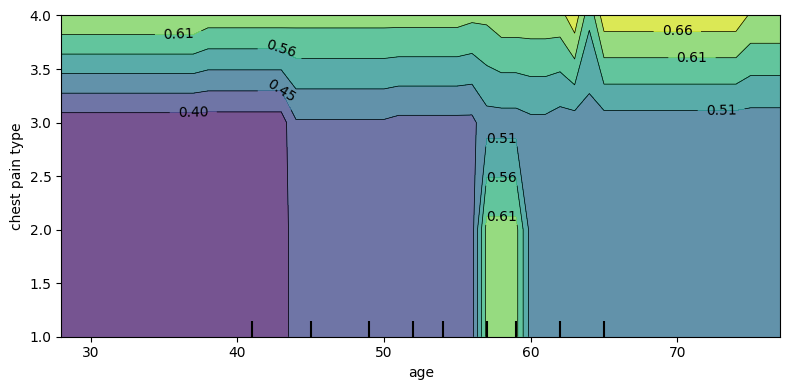

Plotting Partial Dependence for: ('age', 'oldpeak')


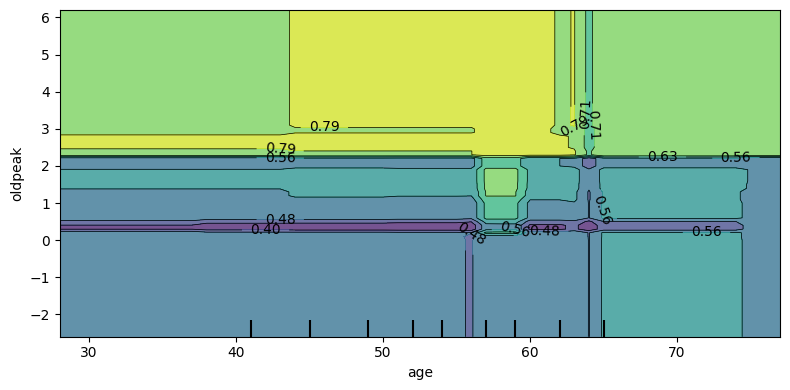

Plotting Partial Dependence for: ('age', 'max heart rate')


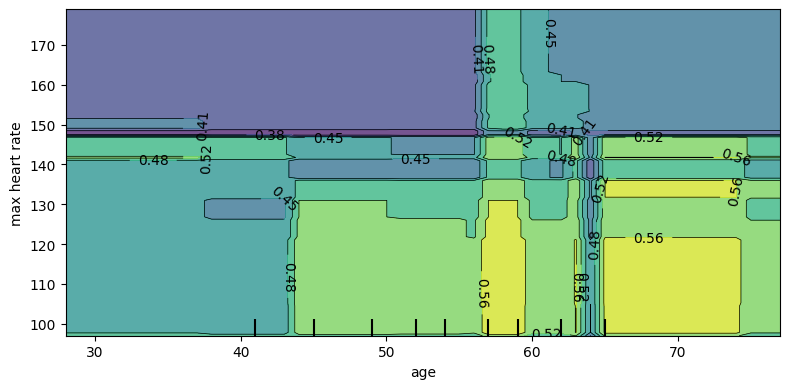

Plotting Partial Dependence for: ('sex', 'ST slope')


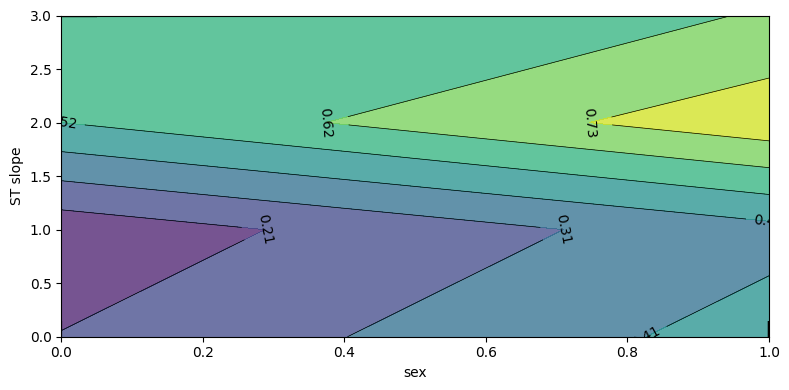

Plotting Partial Dependence for: ('sex', 'chest pain type')


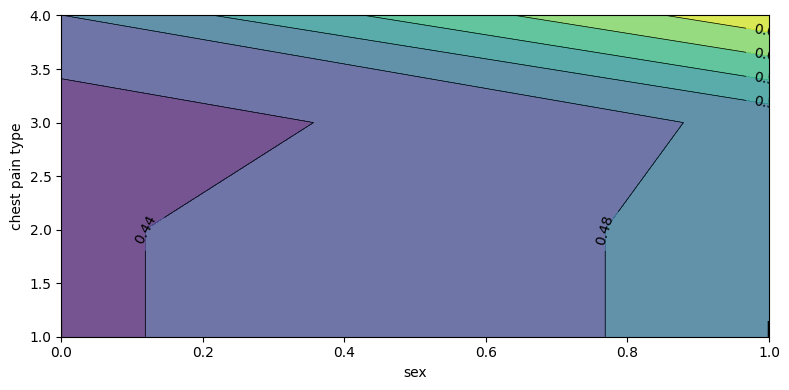

Plotting Partial Dependence for: ('sex', 'oldpeak')


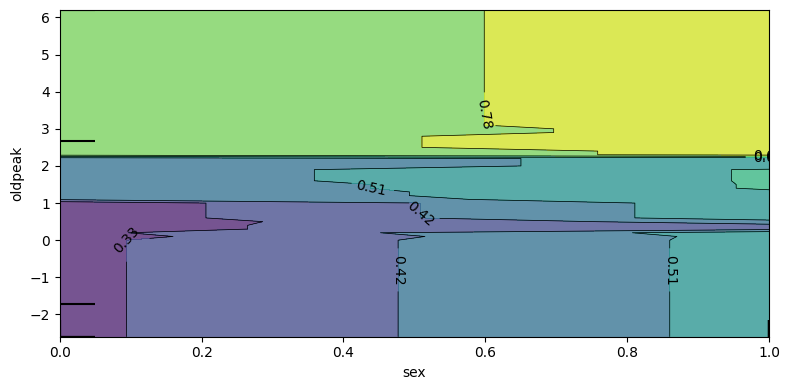

Plotting Partial Dependence for: ('sex', 'max heart rate')


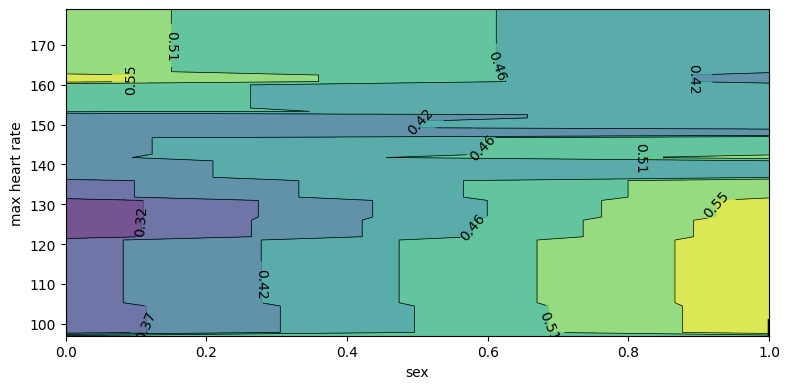

Plotting Partial Dependence for: ('ST slope', 'chest pain type')


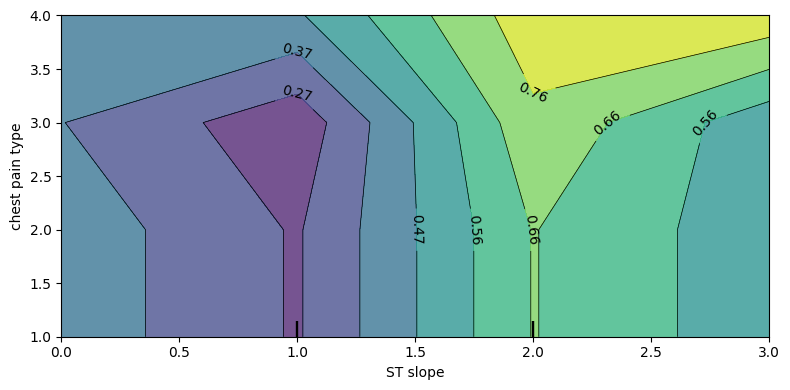

Plotting Partial Dependence for: ('ST slope', 'oldpeak')


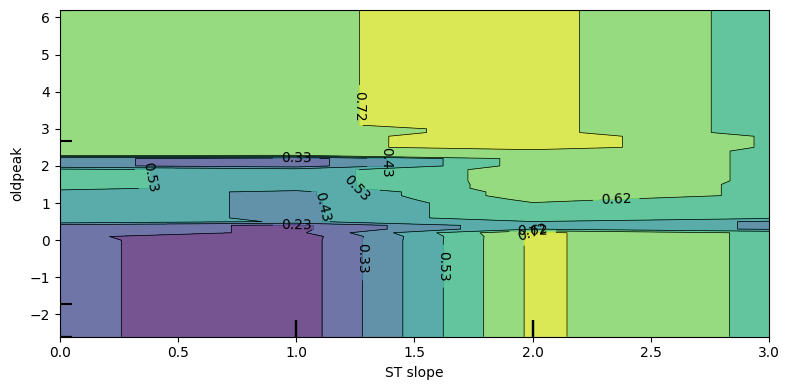

Plotting Partial Dependence for: ('ST slope', 'max heart rate')


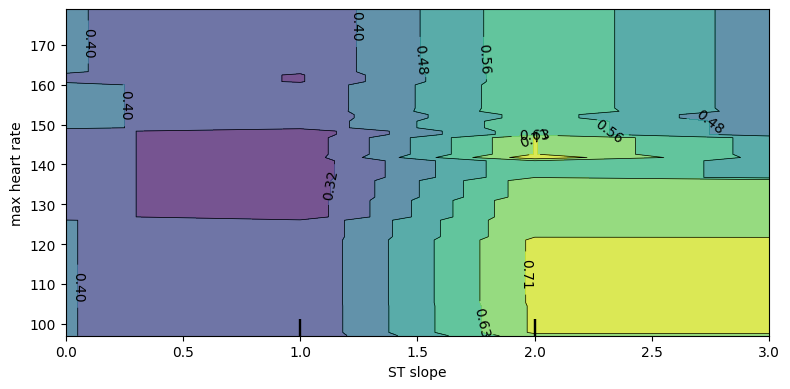

Plotting Partial Dependence for: ('chest pain type', 'oldpeak')


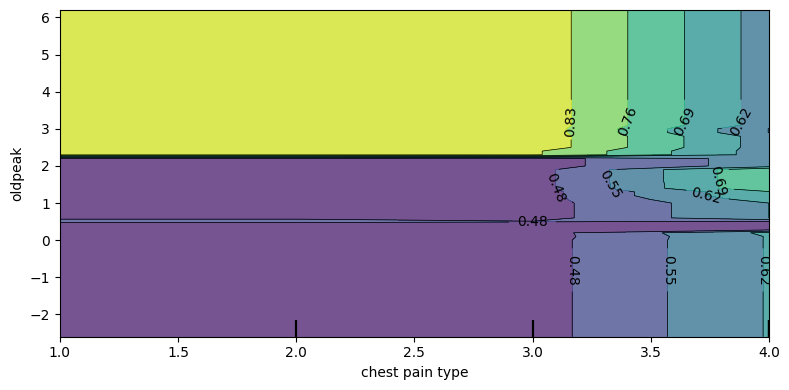

Plotting Partial Dependence for: ('chest pain type', 'max heart rate')


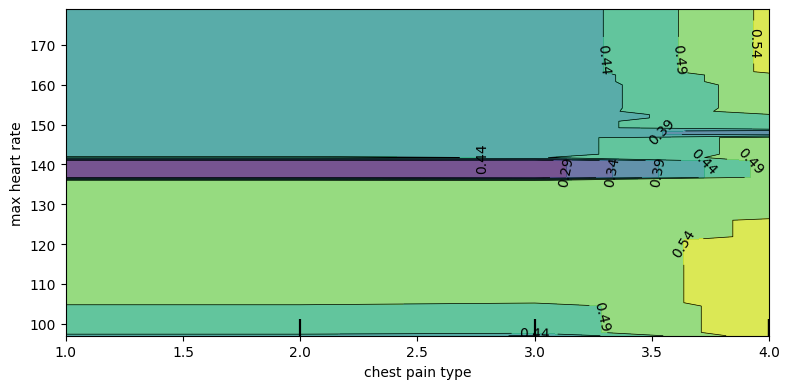

Plotting Partial Dependence for: ('oldpeak', 'max heart rate')


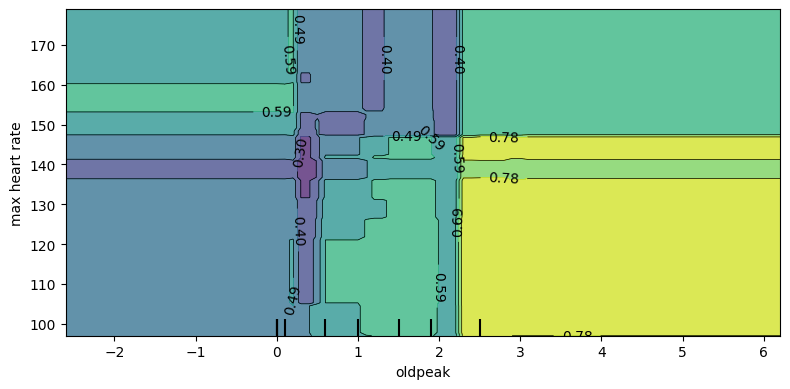

In [20]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from itertools import combinations

selected_features = ['age', 'sex', 'ST slope', 'chest pain type', 'oldpeak', 'max heart rate']

feature_pairs = list(combinations(selected_features, 2))

for pair in feature_pairs:
    print(f"Plotting Partial Dependence for: {pair}")
    fig, ax = plt.subplots(figsize=(8, 4))
    PartialDependenceDisplay.from_estimator(dt_model, X, features=[pair], ax=ax)
    plt.tight_layout()
    plt.show()


# **LIME**

In [15]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=bf4da252d1d78592285aa163fe9dda82f2e0b01dc2cc043ada5ff88a20af7d8e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [19]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)
for i in range(3):
    exp = explainer.explain_instance(x_test.iloc[i], dt_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_all=True)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.